In [278]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from yellowbrick.cluster import SilhouetteVisualizer
import numpy as np

In [279]:
data = pd.read_csv('wine-clustering.csv')

In [280]:
data.shape

(178, 13)

In [281]:
wcss = []
for i in range(2,11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(data)
    wcss.append(round(kmeans.inertia_, 4))

In [282]:
clusters = pd.DataFrame(data=wcss, columns=['wcss result'], index= list(i for i in range(2, 11)))
clusters

,wcss result
2,4.543750e+06
3,2.633555e+06
4,1.351749e+06
5,9.650191e+05
6,6.840507e+05
7,4.149976e+05
8,3.472935e+05
9,2.901116e+05
10,2.377290e+05


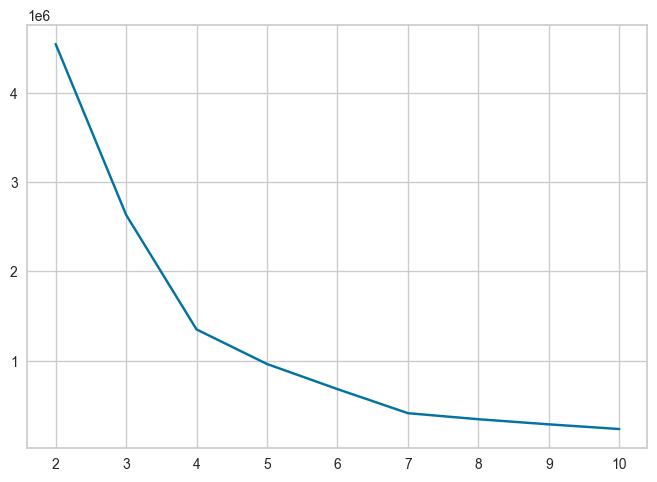

In [283]:
plt.plot(clusters)

In [284]:
kmeans = KMeans(n_clusters=3, init='k-means++', random_state=42)
kmeans.fit(data)

KMeans(n_clusters=3, random_state=42)

In [285]:
y_pred = kmeans.fit_predict(data)

In [286]:
y_pred

array([1, 1, 2, 2, 1, 2, 2, 2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1,
       1, 1, 1, 1, 2, 2, 1, 1, 2, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 1, 2, 1, 2, 2, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1,
       1, 0])

C:\Users\juano\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


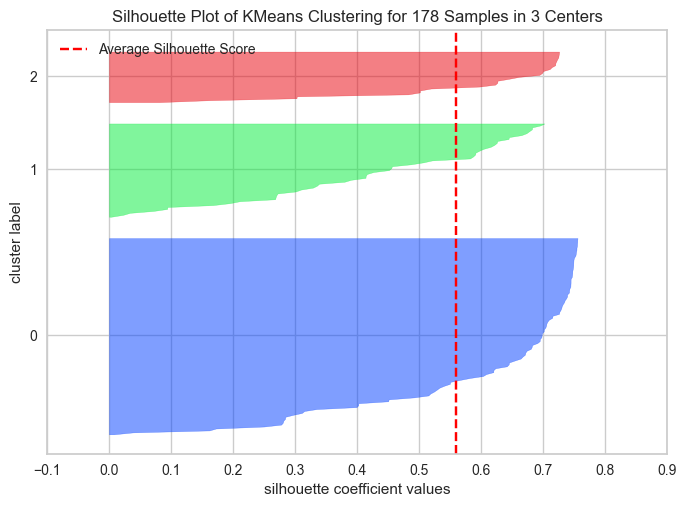

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 178 Samples in 3 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [287]:
visualizer = SilhouetteVisualizer(kmeans, colors="sns_bright")
visualizer.fit(data)
visualizer.show()

In [288]:
kmeans.cluster_centers_

array([[1.25985294e+01, 2.45343137e+00, 2.32186275e+00, 2.06460784e+01,
        9.36960784e+01, 2.05362745e+00, 1.64754902e+00, 3.95980392e-01,
        1.42509804e+00, 4.67333332e+00, 9.17843137e-01, 2.39480392e+00,
        5.21558824e+02],
       [1.33691837e+01, 2.40000000e+00, 2.39265306e+00, 1.85142857e+01,
        1.09081633e+02, 2.44163265e+00, 2.21367347e+00, 3.25510204e-01,
        1.70673469e+00, 5.18836735e+00, 9.59714286e-01, 2.84795918e+00,
        9.06346939e+02],
       [1.38507407e+01, 1.77851852e+00, 2.48777778e+00, 1.69259259e+01,
        1.05629630e+02, 2.94148148e+00, 3.13666667e+00, 2.98888889e-01,
        2.00703704e+00, 6.27518519e+00, 1.10296296e+00, 3.00222222e+00,
        1.30877778e+03]])

In [289]:
labels = kmeans.labels_

In [290]:
X = np.array(data)

In [291]:
from sklearn.metrics import silhouette_score
silhouette_score(X, y_pred)

0.5595823478987215